In [1]:
import onmt
import onmt.io
import onmt.translate
import onmt.ModelConstructor
from collections import namedtuple

In [2]:
# Load the model.
Opt = namedtuple('Opt', ['model', 'data_type', 'reuse_copy_attn', "gpu"])

In [3]:
opt = Opt("models/en_es_euro_acc_59.52_ppl_7.18_e13.pt", "text",False, 0)

In [7]:
# Test data
data = onmt.io.build_dataset(fields, "text", "data/en2.txt", None, use_filter_pred=False)

average src size 7.0 4


In [8]:
data_iter = onmt.io.OrderedIterator(
        dataset=data, device=0,
        batch_size=1, train=False, sort=False,
        sort_within_batch=True, shuffle=False)

In [4]:
fields, model, model_opt =  onmt.ModelConstructor.load_test_model(opt,{"reuse_copy_attn":False})

Loading model parameters.


In [19]:
scorer= onmt.translate.GNMTGlobalScorer(0, 0, "none", "none")

In [20]:
# Translator
translator = onmt.translate.Translator(model, fields,
                                           beam_size=5,
                                           n_best=1,
                                           global_scorer=scorer,
                                           gpu=True)

In [21]:
builder = onmt.translate.TranslationBuilder(
        data, translator.fields,
        1, False, None)

In [23]:
for j, batch in enumerate(data_iter):
        batch_data = translator.translate_batch(batch, data)
        translations = builder.from_batch(batch_data)
        print("src:", " ".join(translations[0].src_raw))
        print("tgt:", " ".join(translations[0].pred_sents[0]))
        print()

src: ﻿I want to meet the president of our country.
tgt: <unk> quiere reunirse con el presidente de nuestro país.

src: I will invite everyone to my personal party.
tgt: Invito a todos a mi partido personal.

src: I want a report for Thursday.
tgt: Quiero un informe el jueves.

src: Saturday is the admission exam.
tgt: El sábado es la <unk>



d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: generator 'Iterator.__iter__' raised StopIteration
  """Entry point for launching an IPython kernel.


### Visualizando la matriz  attention

In [26]:
bts = []
for batch in data_iter:
    bts.append(batch)

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: generator 'Iterator.__iter__' raised StopIteration
  


In [27]:
batch_data = translator.translate_batch(bts[0], data)
translations = builder.from_batch(batch_data)

In [33]:
attn = translations[0].attns
attn

[
  0.6511  0.2289  0.0574  0.0345  0.0059  0.0107  0.0036  0.0039  0.0039
  0.1227  0.3464  0.1793  0.2648  0.0297  0.0398  0.0042  0.0057  0.0075
  0.0426  0.0210  0.0264  0.5496  0.1673  0.1528  0.0173  0.0143  0.0087
  0.0946  0.0371  0.0282  0.1119  0.3500  0.3292  0.0132  0.0186  0.0172
  0.0360  0.0072  0.0057  0.0512  0.2077  0.5760  0.0458  0.0382  0.0321
  0.0161  0.0029  0.0032  0.0133  0.0180  0.7193  0.1558  0.0189  0.0525
  0.0126  0.0037  0.0036  0.0081  0.0051  0.0183  0.1027  0.3313  0.5146
  0.0097  0.0018  0.0021  0.0064  0.0045  0.0096  0.0122  0.3118  0.6419
  0.0051  0.0017  0.0017  0.0017  0.0010  0.0127  0.0054  0.0254  0.9455
  0.6187  0.1747  0.0287  0.0800  0.0147  0.0151  0.0037  0.0150  0.0494
 [torch.cuda.FloatTensor of size 10x9 (GPU 0)]]

In [68]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [46]:
type(attn[0])

torch.cuda.FloatTensor

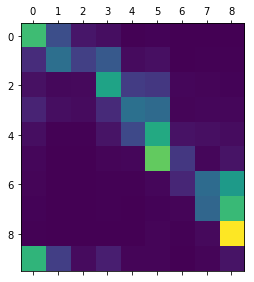

In [45]:
plt.matshow(attn[0])

In [71]:
def showAttention(input_sentence, output_words, attentions):
    # Set up figure with colorbar
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(attentions, cmap='bone')
    fig.colorbar(cax)

    # Set up axes
    ax.set_xticklabels([''] + input_sentence.split(' ') +
                       ['<EOS>'], rotation=90)
    ax.set_yticklabels([''] + output_words.split())

    # Show label at every tick
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()

In [56]:
translations[0].src_raw

('\ufeffI', 'want', 'to', 'meet', 'the', 'president', 'of', 'our', 'country.')

In [63]:
input_sentence = ' '.join(word for word in translations[0].src_raw)
input_sentence

'\ufeffI want to meet the president of our country.'

In [49]:
translations[0].pred_sents[0]

['<unk>',
 'quiere',
 'reunirse',
 'con',
 'el',
 'presidente',
 'de',
 'nuestro',
 'país.']

In [64]:
output_words = ' '.join(word for word in translations[0].pred_sents[0])
output_words

'<unk> quiere reunirse con el presidente de nuestro país.'

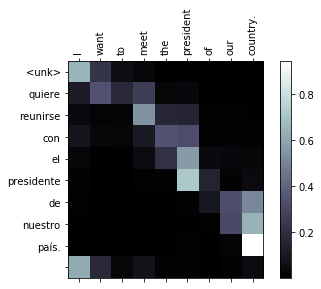

In [72]:
showAttention(input_sentence,output_words,attn[0] )